# Analyzing Real Data

In [1]:
import pandas as pd

In [2]:
# This recovers the previously define dataframe
df = pd.read_csv("./data/hot_dogs_data.csv", na_values=-9, index_col="botid #").drop(columns=[" "])
df.columns = df.columns.str.strip()
df["date"] = pd.to_datetime(df['date mmddyy'], format='%m%d%y')
df = df.drop(columns=["date mmddyy"])
df = df.drop(columns=["no2 nmol/kg"])
df

,press dbar,temp ITS-90,csal PSS-78,coxy umol/kg,ph,phos umol/kg,nit umol/kg,doc umol/kg,hbact #*1e5/ml,pbact #*1e5/ml,sbact #*1e5/ml,date
botid #,,,,,,,,,,,,
2190200124,5.5,23.0629,35.2514,214.1,NaN,0.10,0.03,NaN,NaN,NaN,NaN,2010-03-09
2190200123,59.6,23.0670,35.2506,214.6,NaN,0.11,0.06,NaN,NaN,NaN,NaN,2010-03-09
2190200122,90.7,21.7697,35.1897,213.4,NaN,0.12,0.08,NaN,NaN,NaN,NaN,2010-03-09
2190200121,119.4,20.7957,35.1666,208.5,NaN,0.15,0.50,NaN,NaN,NaN,NaN,2010-03-09
2190200120,153.6,20.1517,35.2192,204.6,NaN,0.15,1.15,NaN,NaN,NaN,NaN,2010-03-09
...,...,...,...,...,...,...,...,...,...,...,...,...
3170200706,147.8,21.9505,34.9545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20
3170200705,147.7,21.9577,34.9530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20
3170200704,173.4,20.3973,35.0368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-20


In [3]:
df.shape

(21222, 12)

In [4]:
df.count()

press dbar        21222
temp ITS-90       21222
csal PSS-78       21210
coxy umol/kg       3727
ph                  885
phos umol/kg       2259
nit umol/kg        2253
doc umol/kg         868
hbact #*1e5/ml      750
pbact #*1e5/ml      749
sbact #*1e5/ml      750
date              21222
dtype: int64

<AxesSubplot:xlabel='date'>

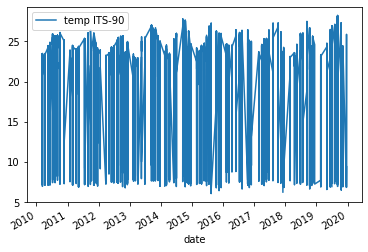

In [5]:
df.plot(x="date", y="temp ITS-90", kind="line")

<AxesSubplot:xlabel='date'>

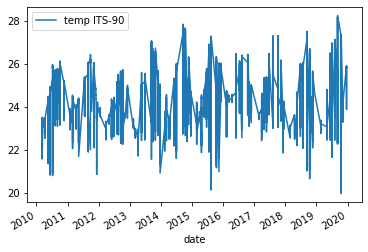

In [6]:
surface_samples = df[df["press dbar"] < 100]
surface_samples.plot(x="date", y="temp ITS-90", kind="line")

In [7]:
grouped_surface_samples = surface_samples.groupby(df.date.dt.year).mean()
grouped_surface_samples

,press dbar,temp ITS-90,csal PSS-78,coxy umol/kg,ph,phos umol/kg,nit umol/kg,doc umol/kg,hbact #*1e5/ml,pbact #*1e5/ml,sbact #*1e5/ml
date,,,,,,,,,,,
2010,37.517015,24.438342,35.282562,213.306024,8.063846,0.075842,0.033465,73.810154,4.614946,1.909351,0.014351
2011,40.025449,24.545986,35.225530,210.137566,8.072089,0.056455,0.029464,74.384000,4.651204,1.783857,0.019388
2012,37.503730,24.286195,35.200273,211.909375,8.061535,0.114953,0.018224,72.578871,4.787081,1.968270,0.015351
2013,38.544562,24.449899,35.302473,211.057143,8.064927,0.087264,0.026981,71.548413,4.778000,2.345216,0.020162
2014,40.763369,24.755485,35.287073,211.538974,8.069786,0.065983,0.025652,72.237091,4.845439,2.223146,0.018927
2015,37.930929,24.799153,35.210472,210.160287,8.065829,0.071795,0.029211,70.894154,4.838659,2.182341,0.018386
2016,37.814300,24.940249,34.995771,208.771186,8.072237,0.068108,0.055676,72.562131,4.467324,2.127529,0.014471
2017,36.499374,24.836940,35.000984,211.143750,8.064918,0.052946,0.033514,70.556863,4.744976,2.109878,0.019927
2018,37.064727,24.580730,34.999648,213.029371,8.054656,0.060000,0.085250,NaN,4.555553,2.035622,0.020711


<AxesSubplot:xlabel='date'>

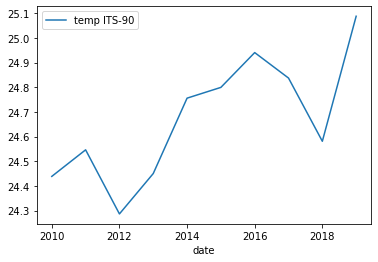

In [8]:
grouped_surface_samples.plot(y="temp ITS-90", kind="line")

In [9]:
grouped_surface_samples = surface_samples.groupby([(surface_samples.date.dt.year),(surface_samples.date.dt.month)]).mean()
grouped_surface_samples

press dbar  temp ITS-90  csal PSS-78  coxy umol/kg       ph  \
date date                                                                
2010 3      39.413665    23.316618    35.257512    213.689474  8.06525   
     4      39.798529    23.231985    35.280043    215.850000  8.05820   
     5      37.785034    23.787439    35.293746    215.600000  8.06300   
     6      38.343791    23.620556    35.462227    218.466667  8.04240   
     7      35.871023    24.834982    35.307447    215.278947  8.05500   
...               ...          ...          ...           ...      ...   
2019 8      39.296269    26.006258    34.597199    213.247059  8.07050   
     9      41.963636    26.412903    34.782988    212.866667  8.06980   
     10     39.273585    25.590081    35.021384    216.330000  8.07100   
     11     37.284800    24.217688    35.038016    211.070000  8.06200   
     12     37.792453    25.790132    34.714728    204.778571  8.07400   

           phos umol/kg  nit umol/kg  doc umol/kg  hbact #*1e5/ml  \
date date                                                           
2010 3         0.097273     0.049091    74.161429         3.69425   
     4         0.090000     0.026364    73.271250         3.93560   
     5         0.083333     0.029167    75.867143         4.63000   
     6         0.036154     0.030000    71.860000         5.31075   
     7         0.045385     0.037692    71.528750         4.74050   
...                 ...          ...          ...             ...   
2019 8         0.090000     0.014545          NaN         5.70980   
     9         0.045000     0.012857          NaN         5.87080   
     10        0.018333     0.035000          NaN         4.72075   
     11        0.032727     0.014545          NaN         5.08375   
     12        0.068182     0.015455          NaN         3.95975   

           pbact #*1e5/ml  sbact #*1e5/ml  
date date                                  
2010 3            1.94600         0.01150  
     4            1.76220         0.02160  
     5            1.77775         0.02075  
     6            1.72175         0.01925  
     7            1.82500         0.01025  
...                   ...             ...  
2019 8            2.22200         0.01100  
     9            2.29900         0.01080  
     10           1.95550         0.00600  
     11           2.49000         0.02075  
     12           1.99125         0.01600  

[94 rows x 11 columns]

<AxesSubplot:xlabel='date,date'>

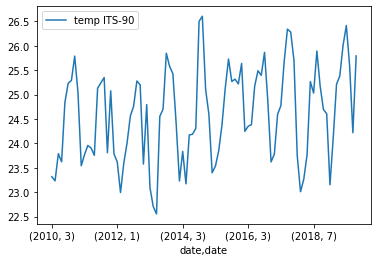

In [10]:
grouped_surface_samples.plot(y="temp ITS-90", kind="line")

<AxesSubplot:xlabel='date,date'>

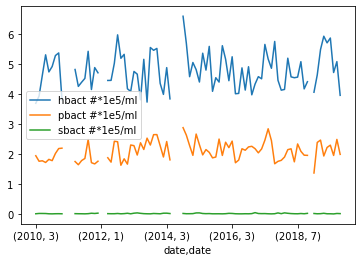

In [11]:
grouped_surface_samples.plot(y=["hbact #*1e5/ml", "pbact #*1e5/ml",
                                "sbact #*1e5/ml"], kind="line")